In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
working_directory=os.getcwd()
print(working_directory)

/Users/jiayiwang/Documents/Data_Career/Python/Kaggle/Kaggle NYC Property Sales


In [2]:
path=working_directory + '/nyc-rolling-sales.csv'

In [3]:
df=pd.read_csv(path)

In [4]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [8]:
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [9]:
df['SALE DATE']=pd.to_datetime(df['SALE DATE'],errors='coerce')
df['SALE PRICE']=pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['LAND SQUARE FEET']=pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']=pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

In [10]:
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')

Text(0.5, 1.0, 'SALE PRICE')

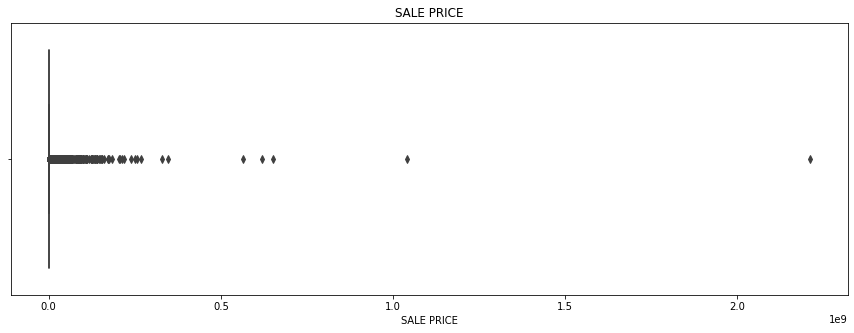

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(x='SALE PRICE',data=df)
plt.title('SALE PRICE')

In [17]:
df=df[df['SALE PRICE'].notnull()]
len(df)

69987

In [18]:
df = df[df['LAND SQUARE FEET'].notnull()] 
df = df[df['GROSS SQUARE FEET'].notnull()] 

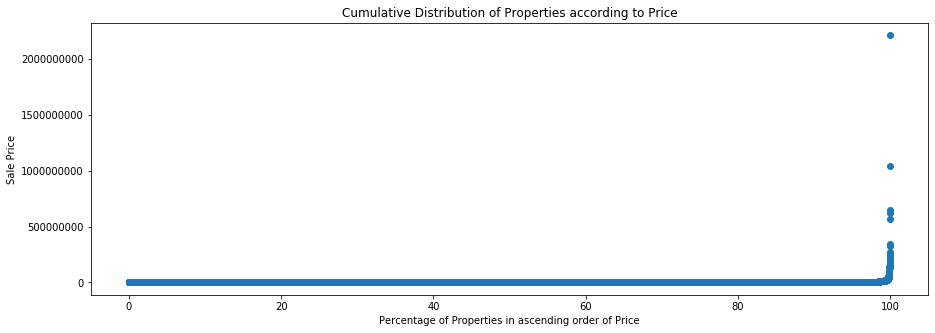

In [23]:
plt.figure(figsize=(15,5))

x=df[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100* x['PROPERTY PROPORTION'] / len(x['PROPERTY PROPORTION'])

plt.plot(x['PROPERTY PROPORTION'],x['SALE PRICE'],linestyle='None',marker='o')
plt.title('Cumulative Distribution of Properties according to Price')
plt.xlabel('Percentage of Properties in ascending order of Price')
plt.ylabel('Sale Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [24]:
df=df[(df['SALE PRICE']>100000) & (df['SALE PRICE']<5000000)]

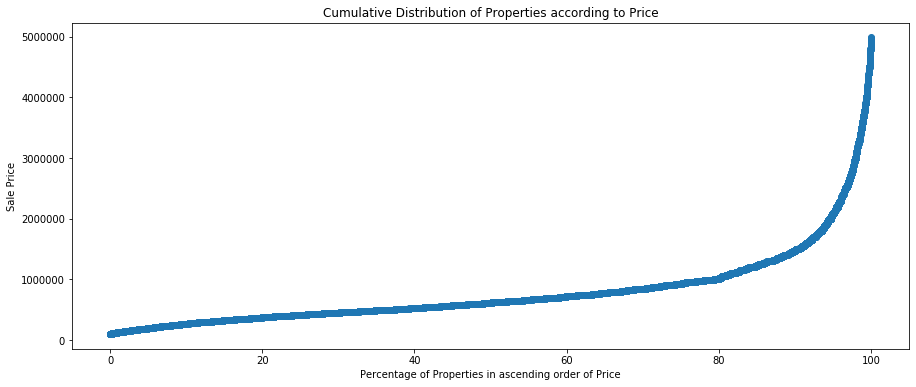

In [25]:
plt.figure(figsize=(15,6))
x = df[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100* x['PROPERTY PROPORTION'] / len(x['PROPERTY PROPORTION'])

# Plot the data and configure the settings
plt.plot(x['PROPERTY PROPORTION'],x['SALE PRICE'], linestyle='None', marker='o')
plt.title('Cumulative Distribution of Properties according to Price')
plt.xlabel('Percentage of Properties in ascending order of Price')
plt.ylabel('Sale Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Text(0.5, 1.0, 'Sale price')

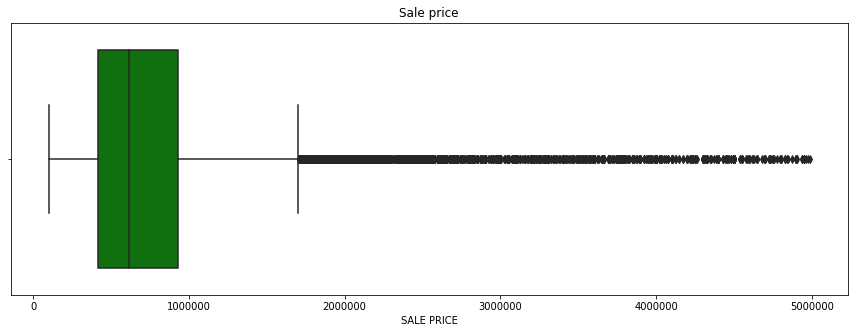

In [27]:
plt.figure(figsize=(15,5))
sns.boxplot(x='SALE PRICE',data=df, color='green')
plt.title('Sale price')

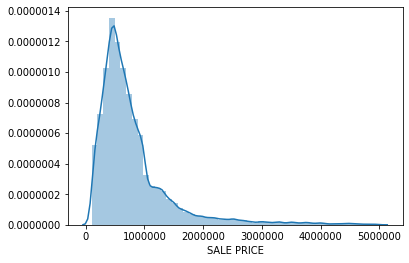

In [28]:
sns.distplot(df['SALE PRICE'])

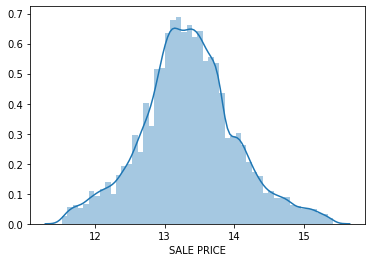

In [30]:
sales=np.log(df['SALE PRICE'])
sns.distplot(sales)

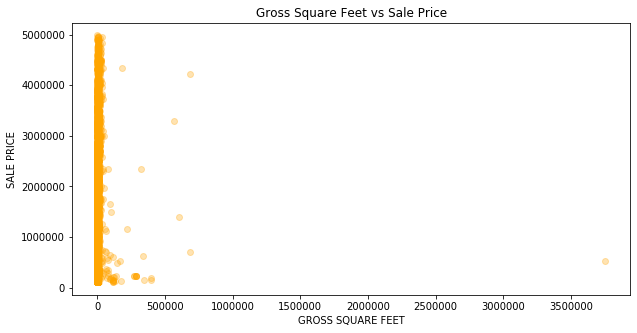

In [37]:
plt.figure(figsize=(10,5))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df,fit_reg=False, scatter_kws={'alpha':0.3},color='orange')
plt.title('Gross Square Feet vs Sale Price')
plt.show()

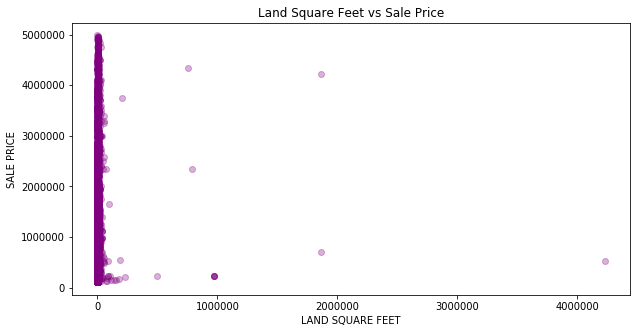

In [38]:
plt.figure(figsize=(10,5))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3}, color='purple')
plt.title('Land Square Feet vs Sale Price')
plt.show()

In [39]:
df=df[df['GROSS SQUARE FEET']<20000]
df = df[df['LAND SQUARE FEET'] < 20000]

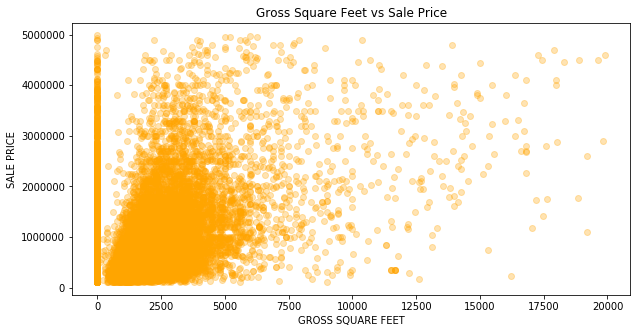

In [40]:
plt.figure(figsize=(10,5))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df,fit_reg=False, scatter_kws={'alpha':0.3},color='orange')
plt.title('Gross Square Feet vs Sale Price')
plt.show()

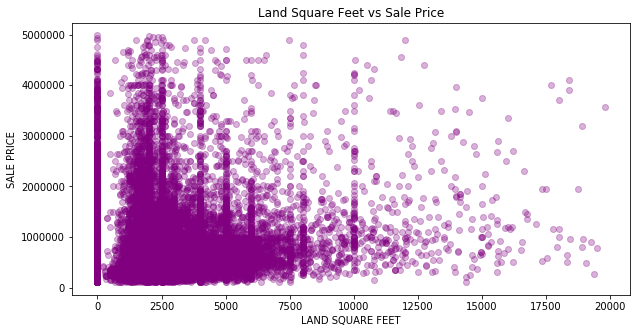

In [41]:
plt.figure(figsize=(10,5))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3}, color='purple')
plt.title('Land Square Feet vs Sale Price')
plt.show()

In [42]:
del df['EASE-MENT']
del df['Unnamed: 0']

In [43]:
sum(df.duplicated(df.columns))

54

In [44]:
df=df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

In [45]:
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] < 50)]

In [46]:
df = df[df['TOTAL UNITS'] == df['COMMERCIAL UNITS'] + df['RESIDENTIAL UNITS']]

In [47]:
df[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] != 2261)] 

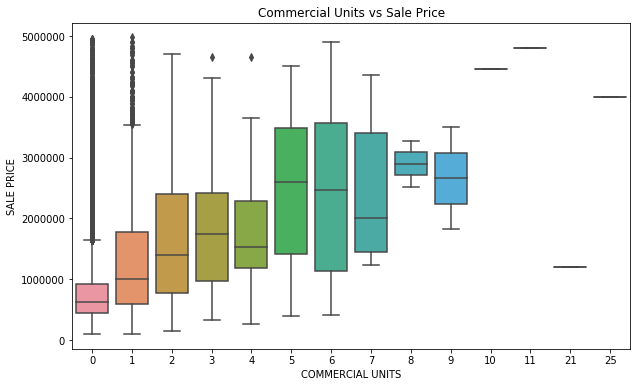

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=df)
plt.title('Commercial Units vs Sale Price')
plt.show()

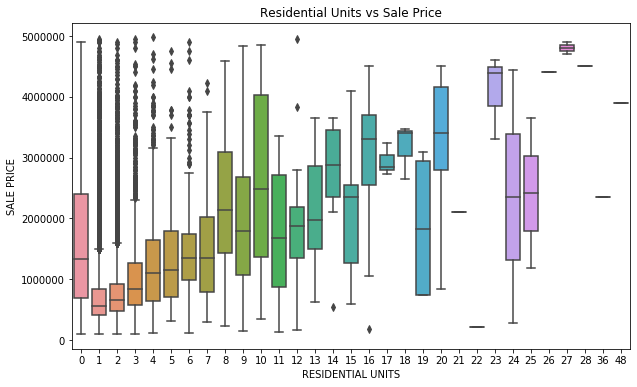

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=df)
plt.title('Residential Units vs Sale Price')
plt.show()

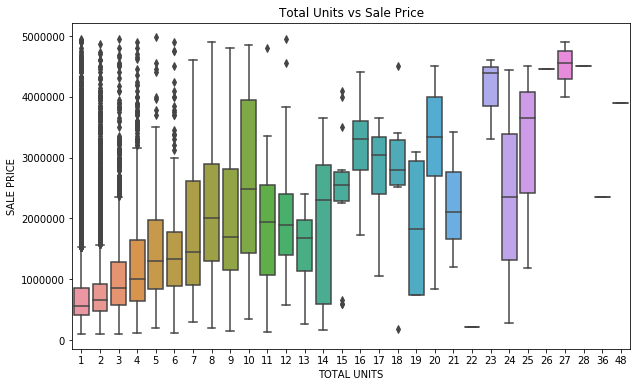

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(x='TOTAL UNITS', y='SALE PRICE', data=df)
plt.title('Total Units vs Sale Price')
plt.show()

In [51]:
df = df[df['YEAR BUILT'] > 0]

In [52]:
df.columns[df.isnull().any()]

Index([], dtype='object')

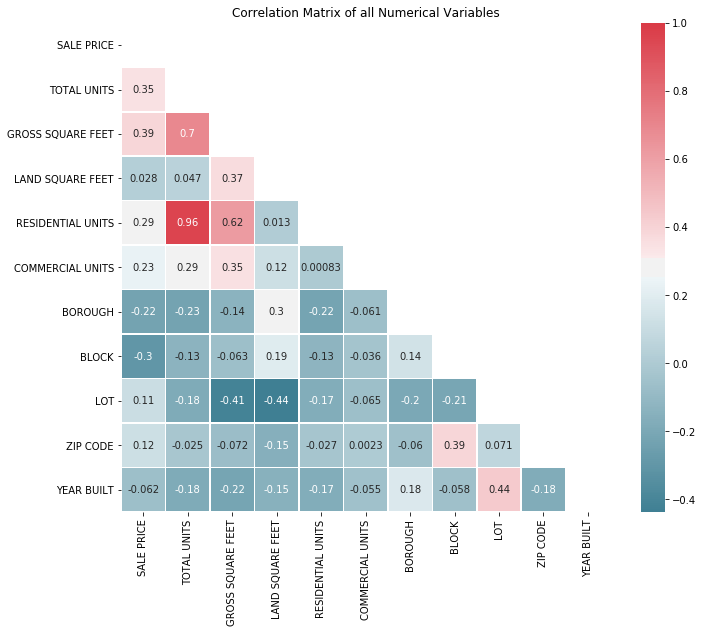

In [53]:
d= df[['SALE PRICE', 'TOTAL UNITS','GROSS SQUARE FEET',  'LAND SQUARE FEET', 'RESIDENTIAL UNITS', 
         'COMMERCIAL UNITS', 'BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'YEAR BUILT',]]
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, 
            square=True, linewidths=.5, annot=True, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

In [55]:
pivot=df.pivot_table(index='TAX CLASS AT TIME OF SALE',values='SALE PRICE', aggfunc=np.median)
pivot

,SALE PRICE
TAX CLASS AT TIME OF SALE,
1,599000.0
2,985000.0
4,1260000.0


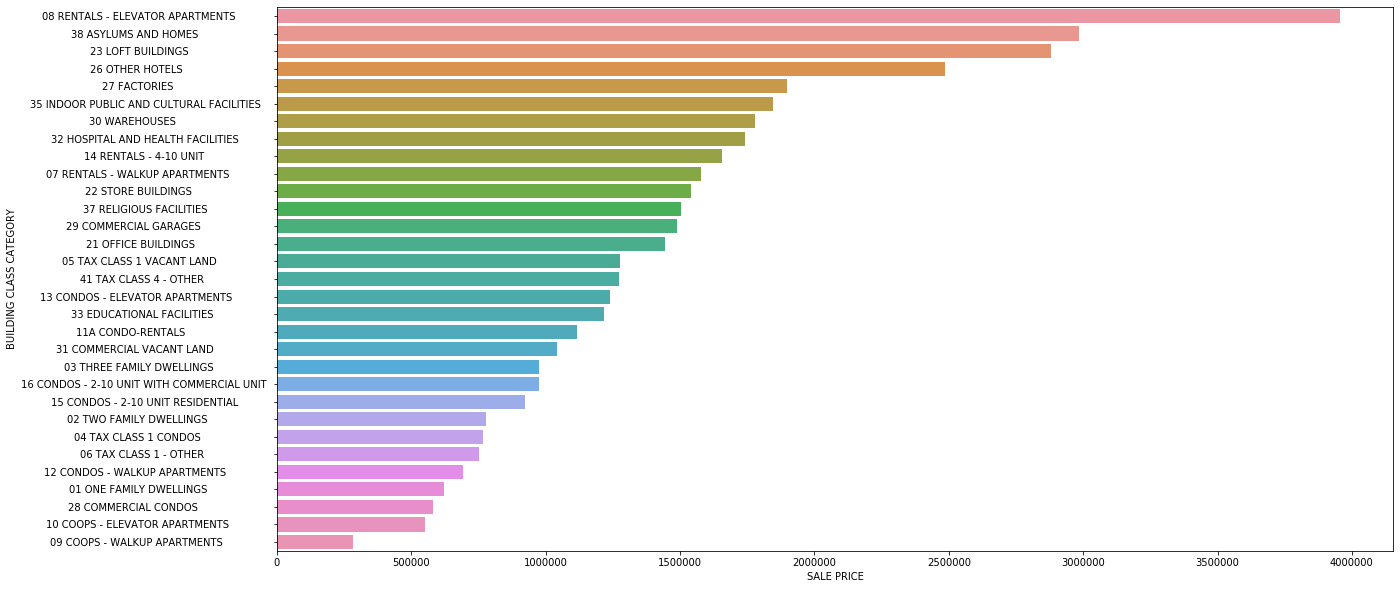

In [57]:
df_1=df[['BUILDING CLASS CATEGORY','SALE PRICE']].groupby(['BUILDING CLASS CATEGORY'],as_index=False).mean().sort_values(by='SALE PRICE',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x='SALE PRICE', y='BUILDING CLASS CATEGORY', data=df_1, orient = 'h')

Text(0.5, 1.0, 'Borough & Sale price')

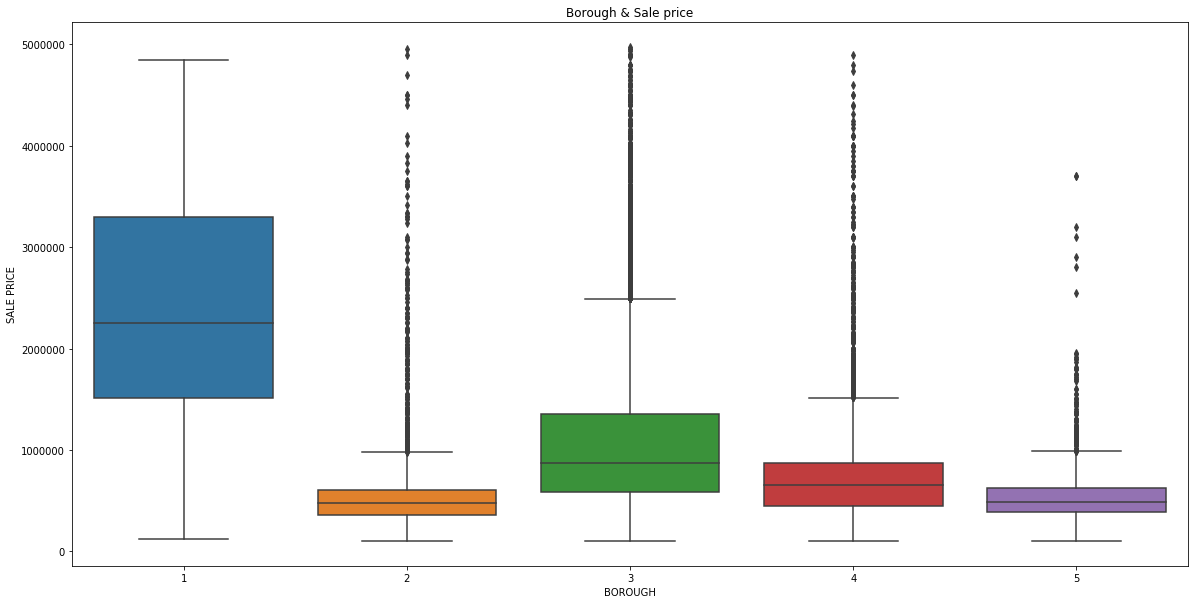

In [60]:
plt.figure(figsize=(20,10))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)
plt.title('Borough & Sale price')

In [62]:
df.columns=[c.replace(' ', '_') for c in df.columns]

In [63]:
from collections import Counter
NEIGHBORHOOD = list(dict(Counter(df.NEIGHBORHOOD).most_common(20)).keys())

avg_sale_prices = []
for i in NEIGHBORHOOD:
    avg_price = np.mean(df.SALE_PRICE[df.NEIGHBORHOOD == i])
    avg_sale_prices.append(avg_price)

Text(0.5, 1.0, 'Average House Price in the top 20 neighborhoods')

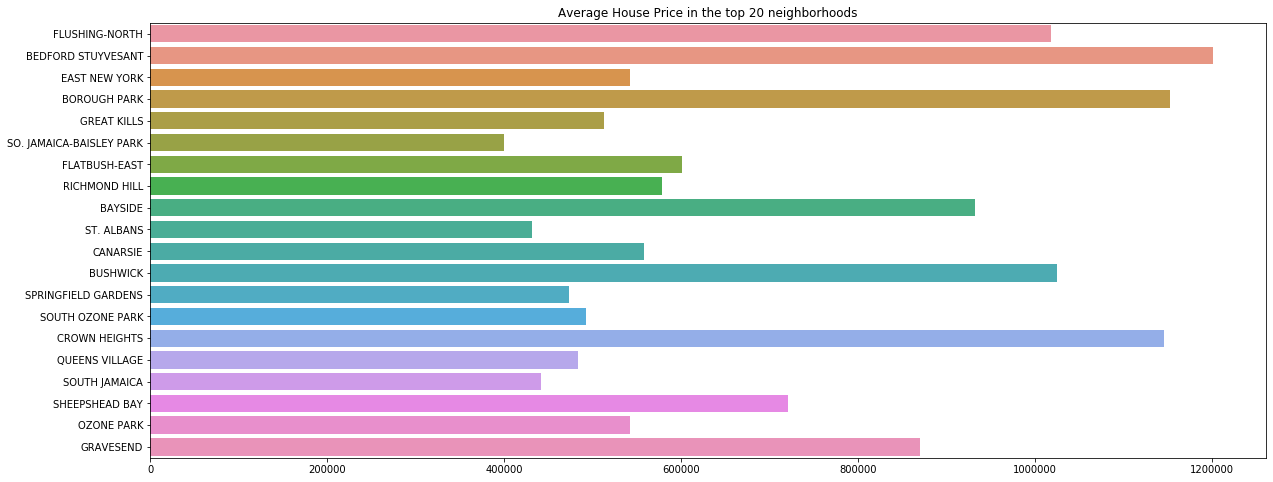

In [64]:
plt.figure(figsize=(20,8))
sns.barplot(x= avg_sale_prices, y= NEIGHBORHOOD , ci=None)
plt.title('Average House Price in the top 20 neighborhoods')